<a href="https://colab.research.google.com/github/mahedishato/cat-vs-dog-CNN-model/blob/main/cat_v_dog_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:08<00:00, 149MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s]


In [25]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/CNN')
zip_ref.close()

KeyboardInterrupt: ignored

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D, MaxPooling2D, Flatten 

In [27]:
#we can uae generators 
train_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/CNN/train',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)


validation_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/CNN/test',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [28]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
#need to normalize 
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image , label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)


In [30]:
from keras.engine import sequential
##create cnn 
model = Sequential()

In [31]:
from keras.backend import flatten
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
his= model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 90s 122ms/step - loss: 0.5912 - accuracy: 0.6775 - val_loss: 0.5265 - val_accuracy: 0.7392
Epoch 2/10
625/625 [==============================] - 77s 122ms/step - loss: 0.4625 - accuracy: 0.7792 - val_loss: 0.4524 - val_accuracy: 0.7928
Epoch 3/10
625/625 [==============================] - 77s 122ms/step - loss: 0.3542 - accuracy: 0.8375 - val_loss: 0.4537 - val_accuracy: 0.8032
Epoch 4/10
625/625 [==============================] - 74s 117ms/step - loss: 0.2111 - accuracy: 0.9140 - val_loss: 0.6266 - val_accuracy: 0.7992
Epoch 5/10
625/625 [==============================] - 76s 120ms/step - loss: 0.1136 - accuracy: 0.9564 - val_loss: 0.8410 - val_accuracy: 0.7920
Epoch 6/10
625/625 [==============================] - 73s 116ms/step - loss: 0.0669 - accuracy: 0.9760 - val_loss: 1.0599 - val_accuracy: 0.7942
Epoch 7/10
625/625 [==============================] - 73s 116ms/step - loss: 0.0595 - accuracy: 0.9803 - val_loss: 0.9653 - val_ac

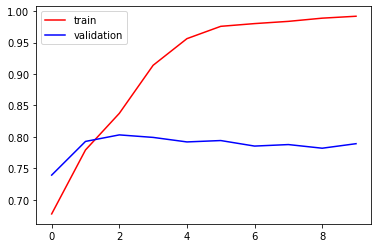

In [35]:
import matplotlib.pyplot as plt

plt.plot(his.history['accuracy'],color='red',label='train')
plt.plot(his.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

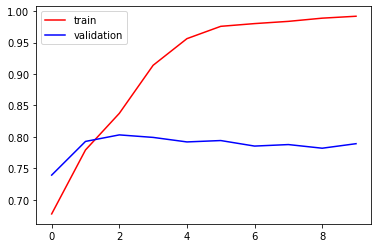

In [37]:
plt.plot(his.history['accuracy'],color='red',label='train')
plt.plot(his.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

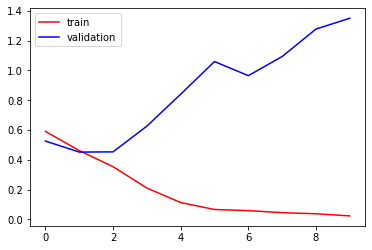

In [38]:
plt.plot(his.history['loss'],color='red',label='train')
plt.plot(his.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

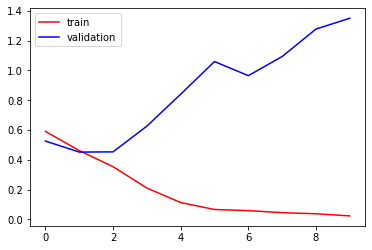

In [39]:
plt.plot(his.history['loss'],color='red',label='train')
plt.plot(his.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [40]:
import cv2

In [41]:
test_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CNN/test/cats/cat.10001.jpg')

In [42]:
test_img.shape

(374, 500, 3)

In [43]:
test_img = cv2.resize(test_img,(256,256))

In [44]:
test_input = test_img.reshape((1,256,256,3))

In [45]:
model.predict(test_input)

array([[0.]], dtype=float32)